In [56]:
# Pandas and Numpy for data structures and util fucntions
import scipy as sp
import numpy as np
import pandas as pd
from numpy.random import rand
pd.options.display.max_colwidth = 600

# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split


# Matplot Imports
import matplotlib.pyplot as plt

%matplotlib inline

# pandas display data frames as tables
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [57]:

import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.datasets import cifar10
from keras.engine import Model
from keras.applications import vgg16 as vgg
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [58]:
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = 10

In [59]:
#LOading data from cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [60]:
#Using VGG16 pretrained model
base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))

In [61]:
# Extract the last layer from third block of vgg16 model
last = base_model.get_layer('block3_pool').output

In [62]:
# Add classification layers on top of it
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.6)(x)
pred = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(base_model.input, pred)

In [63]:

for layer in base_model.layers:
     layer.trainable = False

In [64]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [65]:
initial_weights = model.get_weights()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, epochs = 10, shuffle = True,validation_data=(X_test,y_test))
model.set_weights(initial_weights)

Epoch 1/10
1563/1563 [==============================] - 152s 97ms/step - loss: 1.2019 - accuracy: 0.5814 - val_loss: 0.9018 - val_accuracy: 0.6823
Epoch 2/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.9891 - accuracy: 0.6583 - val_loss: 0.8405 - val_accuracy: 0.7027
Epoch 3/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.9246 - accuracy: 0.6837 - val_loss: 0.8118 - val_accuracy: 0.7120
Epoch 4/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.8638 - accuracy: 0.7009 - val_loss: 0.7887 - val_accuracy: 0.7192
Epoch 5/10
1563/1563 [==============================] - 153s 98ms/step - loss: 0.8292 - accuracy: 0.7123 - val_loss: 0.7736 - val_accuracy: 0.7257
Epoch 6/10
1563/1563 [==============================] - 155s 99ms/step - loss: 0.7884 - accuracy: 0.7269 - val_loss: 0.7700 - val_accuracy: 0.7346
Epoch 7/10
1563/1563 [==============================] - 152s 97ms/step - loss: 0.7672 - accuracy: 0.7358 - val_loss: 0

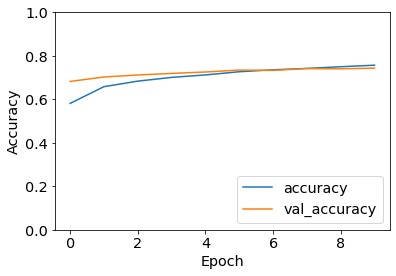

In [66]:
#Plot a graph : Accuracy Vs Val_Accuracy after data augmentation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')